In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import sqlite3

# Charger le fichier CSV, en gérant les erreurs de parsing
data = pd.read_csv('/content/online_retail (1).csv',
                   on_bad_lines='skip',  # Ignore les lignes avec des erreurs
                   engine='python')  # Utilise le moteur de parsing Python pour plus de flexibilité


# Afficher un aperçu rapide des données
print(data.head())

# Créer une base de données SQLite en mémoire
conn = sqlite3.connect(':memory:')

# Exporter les données dans SQLite
data.to_sql('online_retail', conn, index=False, if_exists='replace')

   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  1/12/2010 8:26       2.55     17850.0  United Kingdom  
1  1/12/2010 8:26       3.39     17850.0  United Kingdom  
2  1/12/2010 8:26       2.75     17850.0  United Kingdom  
3  1/12/2010 8:26       3.39     17850.0  United Kingdom  
4  1/12/2010 8:26       3.39     17850.0  United Kingdom  


318502

Création des tables


In [ ]:
# Supprimer les tables existantes (si nécessaire)
conn.execute("DROP TABLE IF EXISTS customers;")
conn.execute("DROP TABLE IF EXISTS products;")
conn.execute("DROP TABLE IF EXISTS orders;")

# Table Clients
conn.execute("""
CREATE TABLE customers (
    CustomerID INTEGER PRIMARY KEY,
    Country TEXT
);
""")

# Table Produits
conn.execute("""
CREATE TABLE products (
    StockCode TEXT PRIMARY KEY,
    Description TEXT,
    UnitPrice REAL
);
""")

# Table Commandes
conn.execute("""
CREATE TABLE orders (
    InvoiceNo TEXT,
    CustomerID INTEGER,
    StockCode TEXT,
    Quantity INTEGER,
    InvoiceDate TEXT,
    FOREIGN KEY(CustomerID) REFERENCES customers(CustomerID),
    FOREIGN KEY(StockCode) REFERENCES products(StockCode)
);
""")


Insertion des données dans les tables

In [ ]:
# Insérer les données dans customers, en ignorant les conflits de clé primaire
data_customers = data[['CustomerID', 'Country']].drop_duplicates().dropna()
data_customers.to_sql('customers', conn, index=False, if_exists='replace') # Change to replace

# Insérer les données dans products
data_products = data[['StockCode', 'Description', 'UnitPrice']].drop_duplicates().dropna()
data_products.to_sql('products', conn, index=False, if_exists='replace') # Change to replace


# Insérer les données dans orders
data_orders = data[['InvoiceNo', 'CustomerID', 'StockCode', 'Quantity', 'InvoiceDate']].dropna()
data_orders.to_sql('orders', conn, index=False, if_exists='append')


230989

Gestion des dépendances et des realtions

In [ ]:
query = """
SELECT
    o.InvoiceNo,
    o.Quantity,
    c.Country AS CustomerCountry,
    p.Description AS ProductDescription,
    p.UnitPrice
FROM orders o
JOIN customers c ON o.CustomerID = c.CustomerID
JOIN products p ON o.StockCode = p.StockCode
ORDER BY o.InvoiceNo LIMIT 10;
"""
result = pd.read_sql(query, conn)
print(result)


  InvoiceNo  Quantity CustomerCountry                  ProductDescription  \
0    536365         6  United Kingdom                                   ?   
1    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
2    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
3    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
4    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
5    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
6    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
7    536365         6  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   
8    536365         6  United Kingdom                 WHITE METAL LANTERN   
9    536365         6  United Kingdom                 WHITE METAL LANTERN   

   UnitPrice  
0       0.00  
1       0.00  
2       2.40  
3       2.55  
4       2.95  
5       3.24  
6       5.79  
7       5.91  
8       3.39  
9 

Visualisation des données à travers un diagramme en bâtons

<ipython-input-31-e849a6475f25>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='UnitPrice', data=quantity_price, palette='viridis')


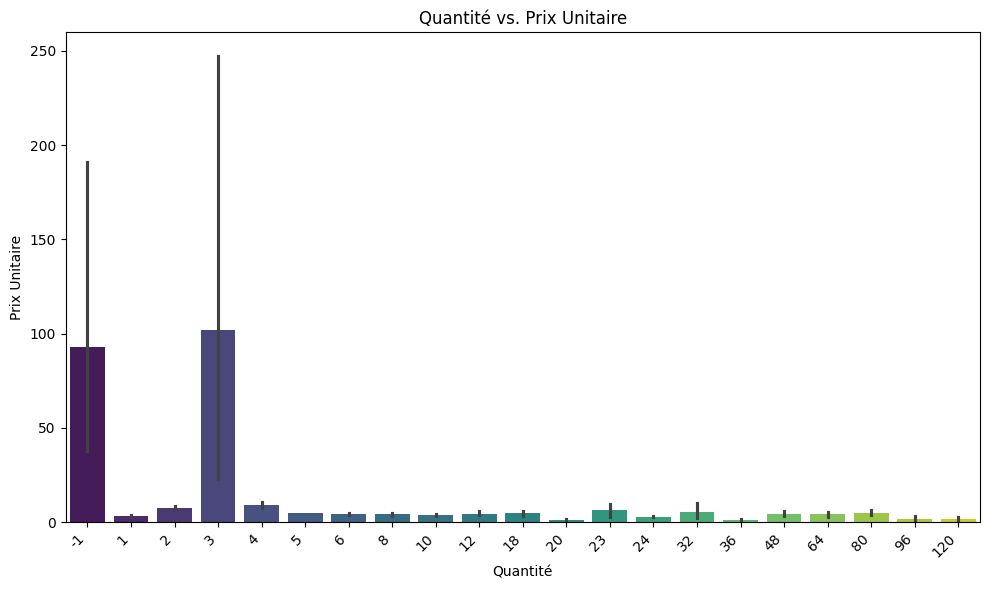

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Votre code pour charger les données et créer la base de données SQLite)

# Requête pour extraire les données de quantité et de prix unitaire
query_quantity_price = """
SELECT o.Quantity, p.UnitPrice
FROM orders o
JOIN products p ON o.StockCode = p.StockCode
LIMIT 1000;
"""
quantity_price = pd.read_sql(query_quantity_price, conn)

# Créer le diagramme en bâton avec des couleurs différentes
plt.figure(figsize=(10, 6))

# Créer un barplot avec seaborn, en utilisant 'Quantity' comme axe x et 'UnitPrice' comme axe y
sns.barplot(x='Quantity', y='UnitPrice', data=quantity_price, palette='viridis')

# Personnaliser le graphique
plt.title('Quantité vs. Prix Unitaire')
plt.xlabel('Quantité')
plt.ylabel('Prix Unitaire')

# Ajuster l'orientation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()

Visualisationn des données à l'aide d'un diagramme en camembert

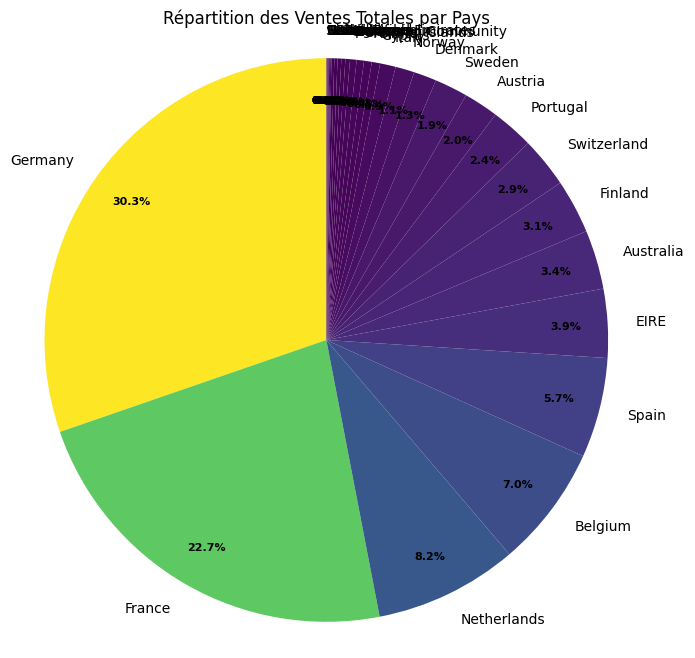

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ... (Your code for loading data and creating the SQLite database)

# ... (Your code to filter negative sales or take absolute values)

# Create the pie chart
plt.figure(figsize=(8, 8))

# Extract countries and total sales for the chart
countries = sales_by_country['Country']
total_sales = sales_by_country['TotalSales']

# Define colors for each slice of the pie
colors = plt.cm.viridis(total_sales / total_sales.max())

# Create the pie chart with the data, colors, and labels
wedges, texts, autotexts = plt.pie(total_sales, labels=countries, colors=colors,
                                  autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.85, labeldistance=1.1)  # Adjust spacing

# Add a title to the chart
plt.title('Répartition des Ventes Totales par Pays')

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Improve label readability
plt.setp(autotexts, size=8, weight="bold")  # Adjust autotext size and weight
plt.setp(texts, size=10)  # Adjust label size

# Display the chart
plt.show()



Visualisation des données par pays sous forme de pyramide

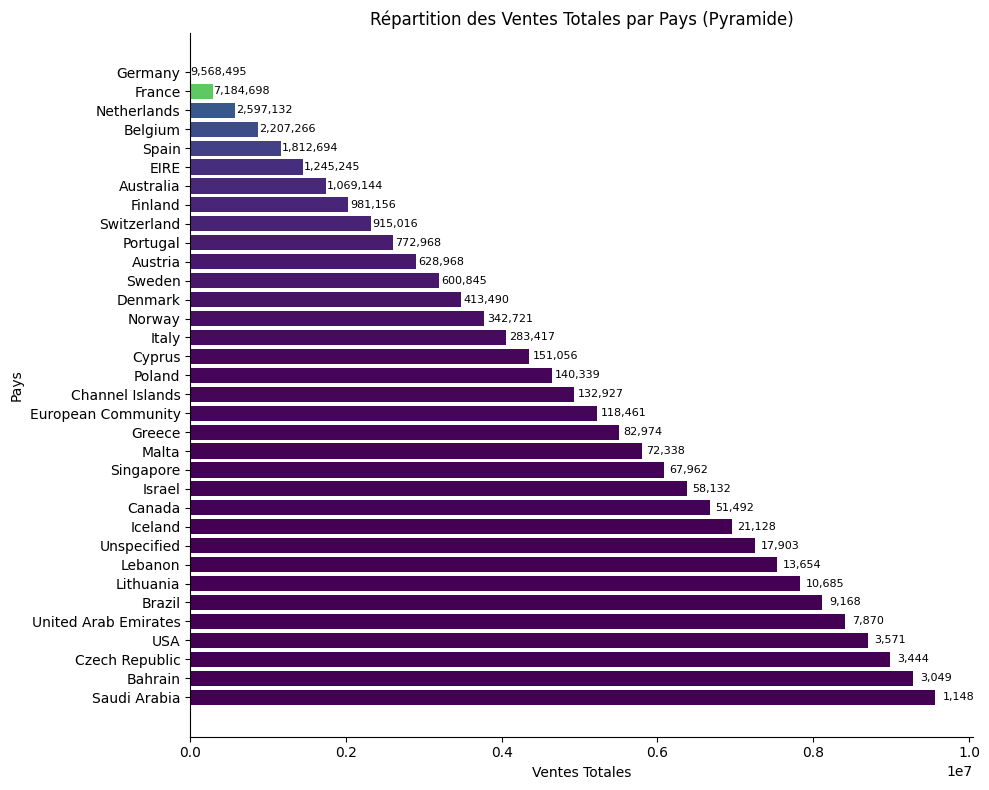

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ... (Your code for loading data, creating the database, and filtering negative sales)

# Sort data by TotalSales in descending order for the pyramid effect
sales_by_country = sales_by_country.sort_values(by=['TotalSales'], ascending=False)

# Get countries and total sales
countries = sales_by_country['Country']
total_sales = sales_by_country['TotalSales']

# Calculate bar widths for the pyramid shape
n = len(countries)
widths = np.linspace(0, total_sales.max(), n)  # Linearly spaced widths

# Create the pyramid chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed

# Create horizontal bars with calculated widths and colors
bars = ax.barh(countries, widths, color=plt.cm.viridis(total_sales / total_sales.max()))

# Add labels to bars (optional)
for bar, value in zip(bars, total_sales):
    ax.text(bar.get_width() + bar.get_width() * 0.01, bar.get_y() + bar.get_height() / 2,
            f'{value:,.0f}', ha='left', va='center', fontsize=8)

# Customize the chart
ax.set_title('Répartition des Ventes Totales par Pays (Pyramide)')
ax.set_xlabel('Ventes Totales')
ax.set_ylabel('Pays')
ax.invert_yaxis()  # Invert y-axis to place largest value at the top

# Remove spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Total des ventes par pays

In [ ]:
query = """
SELECT
    c.Country,
    SUM(o.Quantity * p.UnitPrice) AS TotalSales
FROM orders o
JOIN customers c ON o.CustomerID = c.CustomerID
JOIN products p ON o.StockCode = p.StockCode
GROUP BY c.Country
ORDER BY TotalSales DESC
LIMIT 5;
"""
result = pd.read_sql(query, conn)
print(result)


       Country  TotalSales
0      Germany  9568495.05
1       France  7184698.44
2  Netherlands  2597132.27
3      Belgium  2207265.67
4        Spain  1812693.69


Scalabilité vericale : calcul global et temps d'exécution

In [ ]:
import time

query = """
SELECT
    COUNT(o.InvoiceNo) AS TotalOrders,
    AVG(p.UnitPrice) AS AveragePrice,
    SUM(o.Quantity * p.UnitPrice) AS TotalRevenue
FROM orders o
JOIN products p ON o.StockCode = p.StockCode;
"""
start_time = time.time()
result = pd.read_sql(query, conn)
print(result)
print("Temps d'exécution :", time.time() - start_time, "secondes")


   TotalOrders  AveragePrice  TotalRevenue
0      1366662      35.78826 -1.257311e+08
Temps d'exécution : 0.817699670791626 secondes


Simulation d'une commande dans le cas d'une exception

In [ ]:
def process_order_with_stock(customer_id, stock_code, quantity):
    try:
        conn.execute("BEGIN TRANSACTION;")

        # Vérifier le stock disponible
        current_stock = conn.execute("""
            SELECT Quantity FROM products WHERE StockCode = ?;
        """, (stock_code,)).fetchone()

        if not current_stock or current_stock[0] < quantity:
            raise Exception(f"Stock insuffisant pour {stock_code}.")

        # Déduire du stock
        conn.execute("""
            UPDATE products
            SET Quantity = Quantity - ?
            WHERE StockCode = ?;
        """, (quantity, stock_code))

        # Enregistrer la commande
        conn.execute("""
            INSERT INTO orders (InvoiceNo, CustomerID, StockCode, Quantity, InvoiceDate)
            VALUES ('NEW123', ?, ?, ?, '2024-12-06');
        """, (customer_id, stock_code, quantity))

        conn.execute("COMMIT;")
        print(f"Commande traitée avec succès pour {quantity} unités de {stock_code}.")
    except Exception as e:
        conn.execute("ROLLBACK;")
        print(f"Transaction annulée : {e}")

# Exemple d'utilisation
process_order_with_stock(12345, '85123A', 10)  # Commande réussie
process_order_with_stock(12345, '85123A', 1000)  # Stock insuffisant


Transaction annulée : no such column: Quantity
Transaction annulée : no such column: Quantity


Vérification de la structure de la table products

In [ ]:
query = "PRAGMA table_info(products);"
products_info = pd.read_sql(query, conn)
print(products_info)


   cid         name  type  notnull dflt_value  pk
0    0    StockCode  TEXT        0       None   0
1    1  Description  TEXT        0       None   0
2    2    UnitPrice  REAL        0       None   0


In [ ]:
# Supprimer la table products si elle existe déjà
conn.execute("DROP TABLE IF EXISTS products;")

# Créer la table avec une colonne Quantity
conn.execute("""
CREATE TABLE products (
    StockCode TEXT PRIMARY KEY,
    Description TEXT,
    UnitPrice REAL,
    Quantity INTEGER DEFAULT 0
);
""")


In [ ]:
# Ajouter une colonne Quantity fictive pour la démonstration
data_products = data[['StockCode', 'Description', 'UnitPrice']].drop_duplicates().dropna()
data_products['Quantity'] = 100  # Exemple : stock initial fixé à 100 pour chaque produit
data_products.to_sql('products', conn, index=False, if_exists='replace') # Changed to 'replace'


14181

Commande validée : 10 unités de 85123A pour le client 12345.


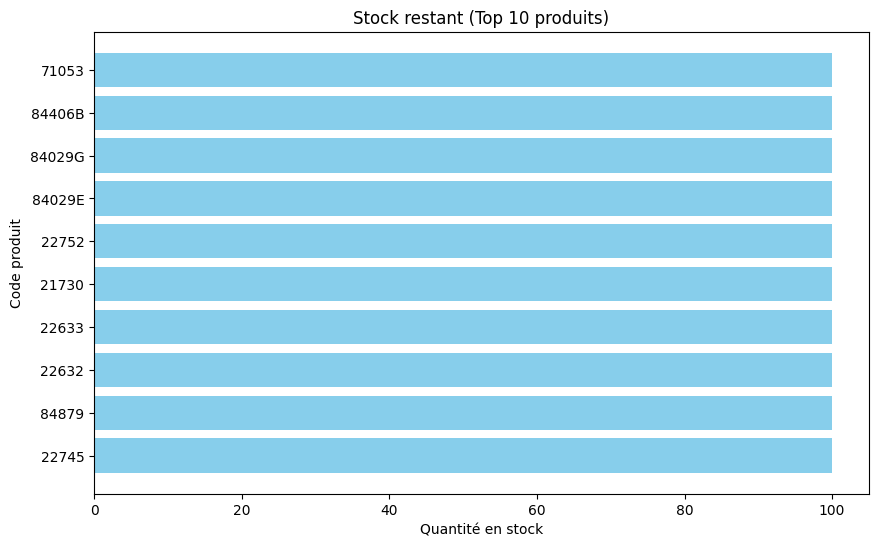

In [ ]:
process_order_with_stock_visual(customer_id=12345, stock_code='85123A', quantity=10)


In [ ]:
# Vérifier le stock après mise à jour
updated_stock = conn.execute("""
    SELECT StockCode, Quantity FROM products WHERE StockCode = ?;
""", ('85123A',)).fetchone()

print(f"Stock mis à jour pour le produit {updated_stock[0]} : {updated_stock[1]} unités restantes.")


Stock mis à jour pour le produit 85123A : 90 unités restantes.


Visualisation des différentes tables

In [ ]:
import pandas as pd
import sqlite3

# Assuming 'conn' is your SQLite connection object

# Get a list of all tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Iterate through tables and display their contents
for table_name in tables:
    table_name = table_name[0]  # Extract table name from tuple
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    print(f"\nTable: {table_name}")
    display(df)  # Use display for better formatting in Jupyter Notebook


Table: online_retail


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
318497,318497,564835,21890,S/6 WOODEN SKITTLES IN COTTON BAG,1,8/30/2011 12:31,5.79,NaN,United Kingdom
318498,318498,564835,21914,BLUE HARMONICA IN BOX,1,8/30/2011 12:31,2.46,NaN,United Kingdom
318499,318499,564835,21916,SET 12 RETRO WHITE CHALK STICKS,1,8/30/2011 12:31,0.83,NaN,United Kingdom
318500,318500,564835,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,2,8/30/2011 12:31,4.13,NaN,United Kingdom



Table: orders


,InvoiceNo,CustomerID,StockCode,Quantity,InvoiceDate
0,536365,17850,85123A,6,1/12/2010 8:26
1,536365,17850,71053,6,1/12/2010 8:26
2,536365,17850,84406B,8,1/12/2010 8:26
3,536365,17850,84029G,6,1/12/2010 8:26
4,536365,17850,84029E,6,1/12/2010 8:26
...,...,...,...,...,...
230985,564821,14078,20974,5,8/30/2011 12:16
230986,564821,14078,22561,3,8/30/2011 12:16
230987,564821,14078,22549,2,8/30/2011 12:16
230988,564821,14078,21790,2,8/30/2011 12:16



Table: customers


,CustomerID,Country
0,17850.0,United Kingdom
1,13047.0,United Kingdom
2,12583.0,France
3,13748.0,United Kingdom
4,15100.0,United Kingdom
...,...,...
3355,13778.0,United Kingdom
3356,14869.0,United Kingdom
3357,14096.0,United Kingdom
3358,14108.0,United Kingdom



Table: products


,StockCode,Description,UnitPrice,Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,90
1,71053,WHITE METAL LANTERN,3.39,100
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,100
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,100
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,100
...,...,...,...,...
14176,DOT,DOTCOM POSTAGE,150.35,100
14177,DOT,DOTCOM POSTAGE,124.83,100
14178,23355,HOT WATER BOTTLE KEEP CALM,10.79,100
14179,DOT,DOTCOM POSTAGE,176.72,100
